# LASSO and Ridge Regularization implementation using Python
### Import desired libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

### Load wine dataset from sklearn datasets

In [2]:
raw_data = load_wine()
X_wine_df = pd.DataFrame(raw_data["data"], columns=raw_data["feature_names"])
X_wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
Y_wine_df = pd.DataFrame(raw_data["target"], columns=["Class"])
Y_wine_df.head()

,Class
0,0
1,0
2,0
3,0
4,0


### Analyze dataset

In [4]:
X_wine_df.shape

(178, 13)

In [5]:
X_wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [6]:
X_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [7]:
X_wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Spilt dataset into train and test datasets

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X_wine_df,Y_wine_df,test_size=0.3, random_state=10)

### Build linear regression model

In [9]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)

y_pred = lr_model.predict(X_test)

#### Calculate score of linear regression model

In [10]:
print("Performance score of model for training data ",lr_model.score(X_train,Y_train)*100)
print("Performance score of model for test data ",lr_model.score(X_test,Y_test)*100)

Performance score of model for training data  92.83961037905854
Performance score of model for test data  76.13815629944806


### Build LASSO regularized model

In [11]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,Y_train)
print ("Lasso model:", (lasso.coef_))
type(lasso.coef_)
lasso.coef_.ndim

Lasso model: [-0.00785461  0.00650259 -0.          0.0261882  -0.00164459  0.05082921
 -0.39477179 -0.         -0.          0.07566912 -0.         -0.18759266
 -0.00084948]


1

#### Calculate score of LASSO regularized model

In [12]:
print(lasso.score(X_train, Y_train)*100)
print(lasso.score(X_test, Y_test)*100)

91.54200838328309
78.32724850336916


### Build Ridge regularized model

In [13]:
ridge = Ridge(alpha=.01)
ridge.fit(X_train,Y_train)
ridge.coef_ = np. reshape(ridge.coef_, 13)
print ("Ridge model:", (ridge.coef_))

Ridge model: [-0.04397947  0.01363271 -0.2453219   0.03384984 -0.00121871  0.27235372
 -0.4806403  -0.2901691  -0.02062008  0.06116507 -0.1080837  -0.27966595
 -0.00070964]


#### Calculate score of Ridge regularized model

In [14]:
print(ridge.score(X_train, Y_train)*100)
print(ridge.score(X_test, Y_test)*100)

92.83959354327627
76.15496037929736


### Build Elastic-net regularized model

In [15]:
elastic_net = ElasticNet(alpha=.01)
elastic_net.fit(X_train,Y_train)
print ("Elastic Net model:", (elastic_net.coef_))

Elastic Net model: [-0.02440541  0.01270288 -0.12612404  0.02985066 -0.0011055   0.13316485
 -0.42172204 -0.         -0.          0.07214671 -0.         -0.22351537
 -0.0007964 ]


#### Calculate score of Elastic-net regularized model

In [16]:
print(elastic_net.score(X_train, Y_train)*100)
print(elastic_net.score(X_test, Y_test)*100)

92.25955900776668
78.39522145578597


### Comparison of Linear regression, LASSO  and Ridge regularized model

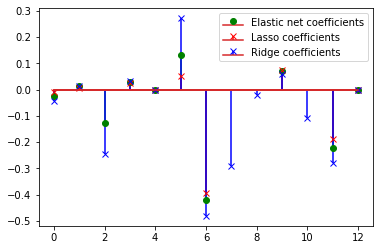

In [17]:
m, s, _ = plt.stem(np.where(elastic_net.coef_)[0], elastic_net.coef_[elastic_net.coef_ != 0],markerfmt='bo', label='Elastic net coefficients')
plt.setp([m, s], color="green")
m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],markerfmt='x', label='Lasso coefficients')
plt.setp([m, s], color='red')
m, s, _ = plt.stem(np.where(ridge.coef_)[0], ridge.coef_[ridge.coef_ != 0], label='Ridge coefficients', markerfmt='bx')
plt.setp([m, s], color='blue')
plt.legend()
plt.show()

In [18]:
result_df = pd.DataFrame(columns=['Dataset', 'Linear Regression', "LASSO Regularization","Ridge Regularization","Elastic Regularization"])
result_df = result_df.append({'Dataset':"Train", 'Linear Regression':"{0:.2f}".format(lr_model.score(X_train,Y_train)*100), "LASSO Regularization":"{0:.2f}".format(lasso.score(X_train,Y_train)*100),"Ridge Regularization":"{0:.2f}".format(ridge.score(X_train,Y_train)*100),"Elastic Regularization":"{0:.2f}".format(elastic_net.score(X_train,Y_train)*100)},ignore_index=True)
result_df = result_df.append({'Dataset':"Test", 'Linear Regression':"{0:.2f}".format(lr_model.score(X_test,Y_test)*100), "LASSO Regularization":"{0:.2f}".format(lasso.score(X_test,Y_test)*100),"Ridge Regularization":"{0:.2f}".format(ridge.score(X_test,Y_test)*100),"Elastic Regularization":"{0:.2f}".format(elastic_net.score(X_test,Y_test)*100)},ignore_index=True)
result_df

,Dataset,Linear Regression,LASSO Regularization,Ridge Regularization,Elastic Regularization
0,Train,92.84,91.54,92.84,92.26
1,Test,76.14,78.33,76.15,78.40
